In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from eeg_net.eeg_net_base import *
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

In [4]:
import numpy as np
X_test = np.load("data/X_test.npy")
y_test = np.load("data/y_test.npy")
person_train_valid = np.load("data/person_train_valid.npy")
X_train_valid = np.load("data/X_train_valid.npy")
y_train_valid = np.load("data/y_train_valid.npy")
person_test = np.load("data/person_test.npy")

# adjust lable to 0,1,2,3
y_train_valid -= 769
y_test -= 769 
print ('y_train_valid', y_train_valid[:10])


y_train_valid [2 3 0 0 0 0 2 1 3 3]


### Shape of data

In [5]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))


Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


## print one data


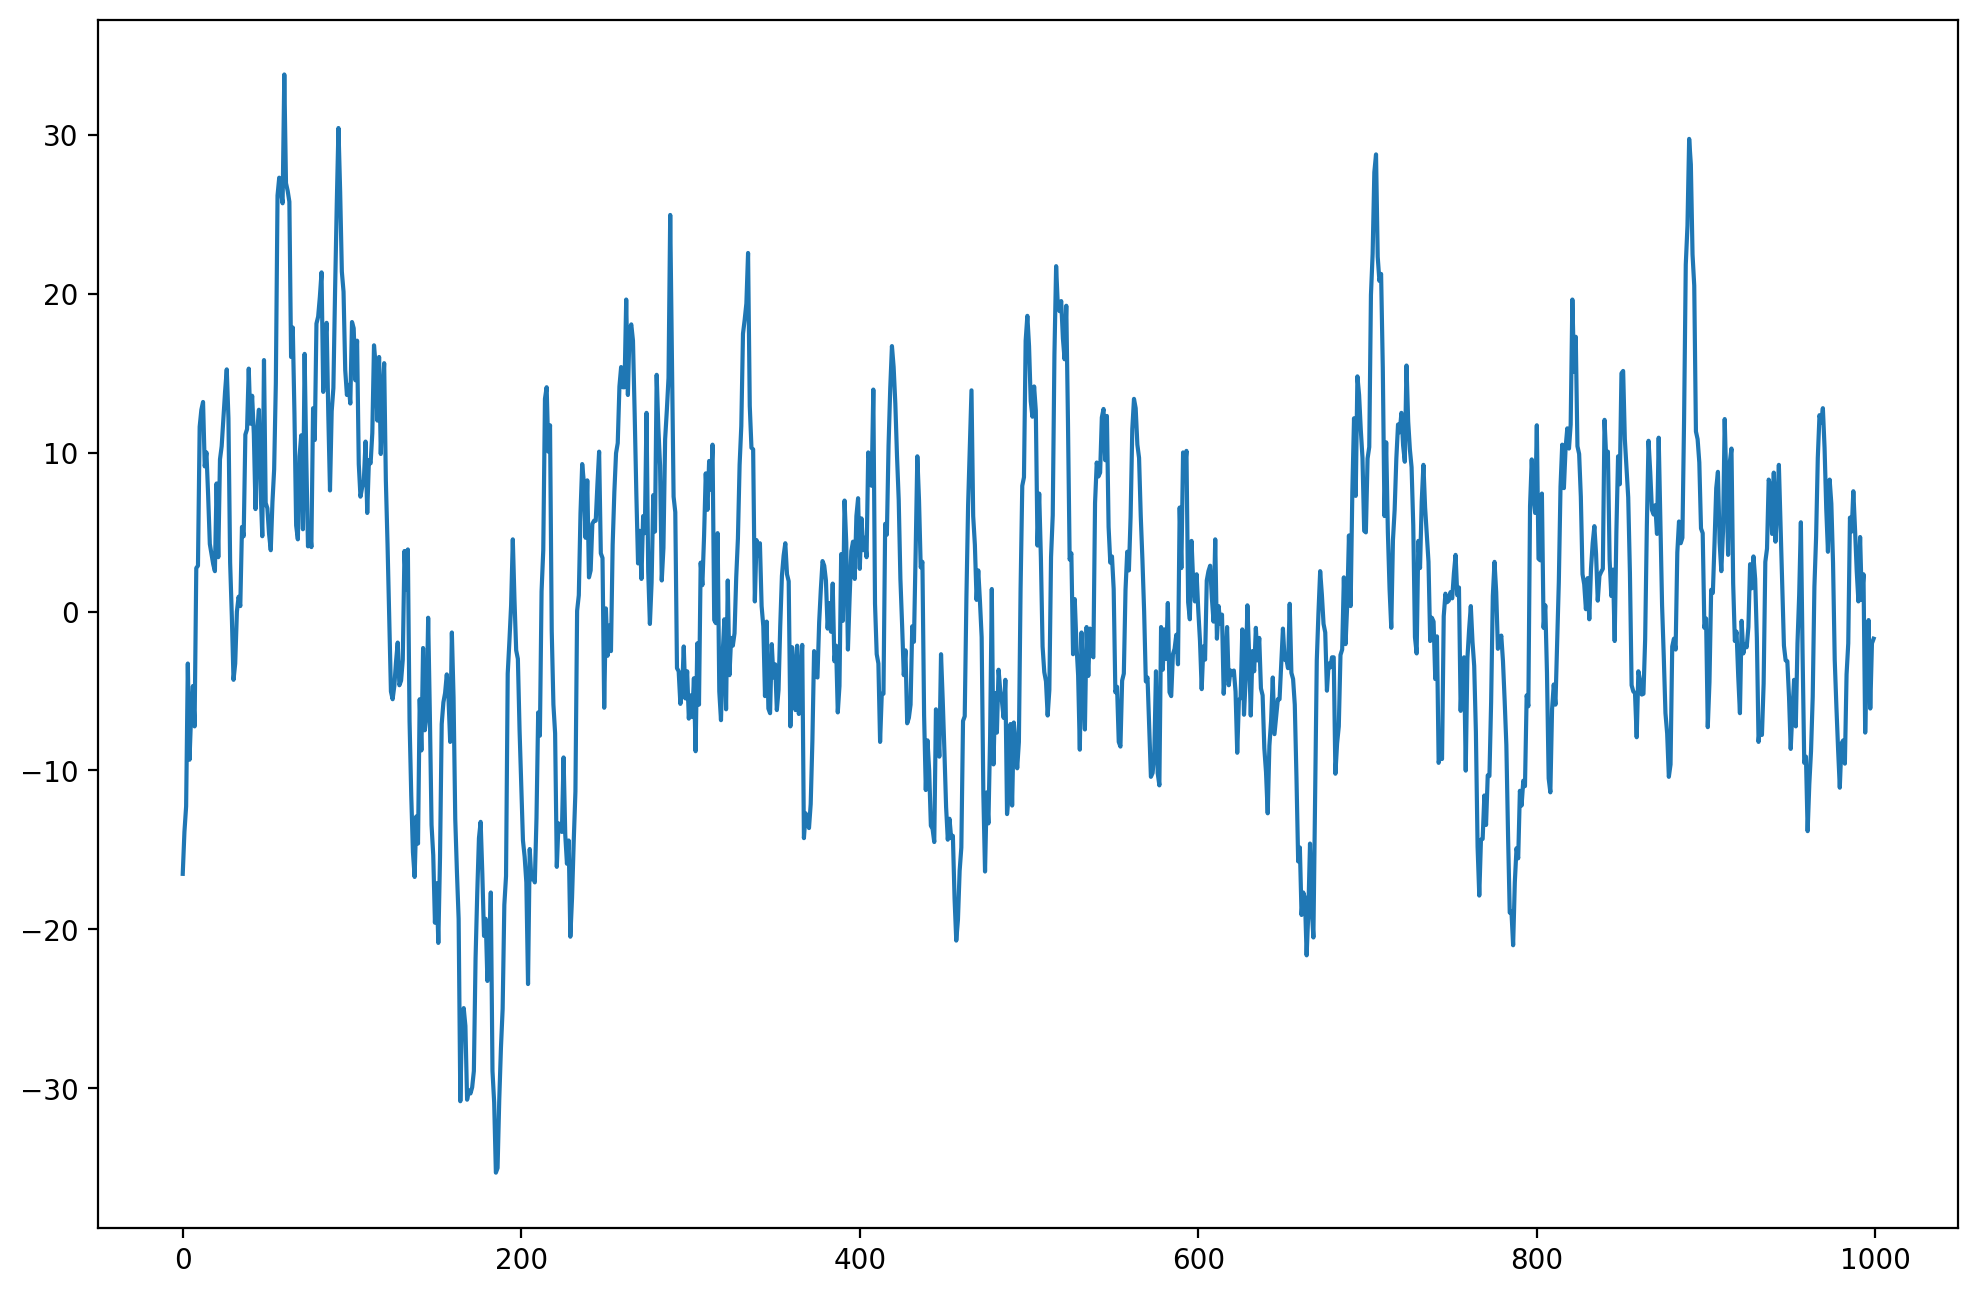

In [14]:
plot = plt.plot(X_train_valid[1,21])

In [5]:
X_test_dir = './data/X_test.npy'
y_test_dir = './data/y_test.npy' 
X_train_valid_dir = './data/X_train_valid.npy' 
y_train_valid_dir = './data/y_train_valid.npy'

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.428786
0	1.398128	0.261792	1.383435	0.274232	
--Iter 49	1.449975
1	1.384679	0.273838	1.383031	0.276596	
--Iter 49	1.439150
2	1.376003	0.318144	1.365433	0.314421	
--Iter 49	1.342889
3	1.351598	0.362281	1.352129	0.349882	
--Iter 49	1.337119
4	1.338059	0.397237	1.345032	0.361702	
--Iter 49	1.322213
5	1.327442	0.411472	1.340547	0.361702	
--Iter 49	1.298077
6	1.316484	0.431183	1.337900	0.349882	
--Iter 49	1.327945
7	1.304191	0.453925	1.324250	0.404255	
--Iter 49	1.310484
8	1.290577	0.465802	1.319228	0.411348	
--Iter 49	1.277330
9	1.270519	0.504127	1.323367	0.375887	
--Iter 49	1.241013
10	1.260060	0.509602	1.295457	0.460993	
--Iter 49	1.244784
11	1.240461	0.540347	1.275030	0.489362	
--Iter 49	1.214724
12	1.227013	0.569491	1.260169	0.510638	
--Iter 49	1.245305
13	1.219798	0.563932	1.253362	0.515366	
--Iter 49	1.199996
14	1.218961	0.556267	1.283550	0.437352	
--Iter 49	1.212808
15	1.193025	0.593834	1.257271	0.486998	
-

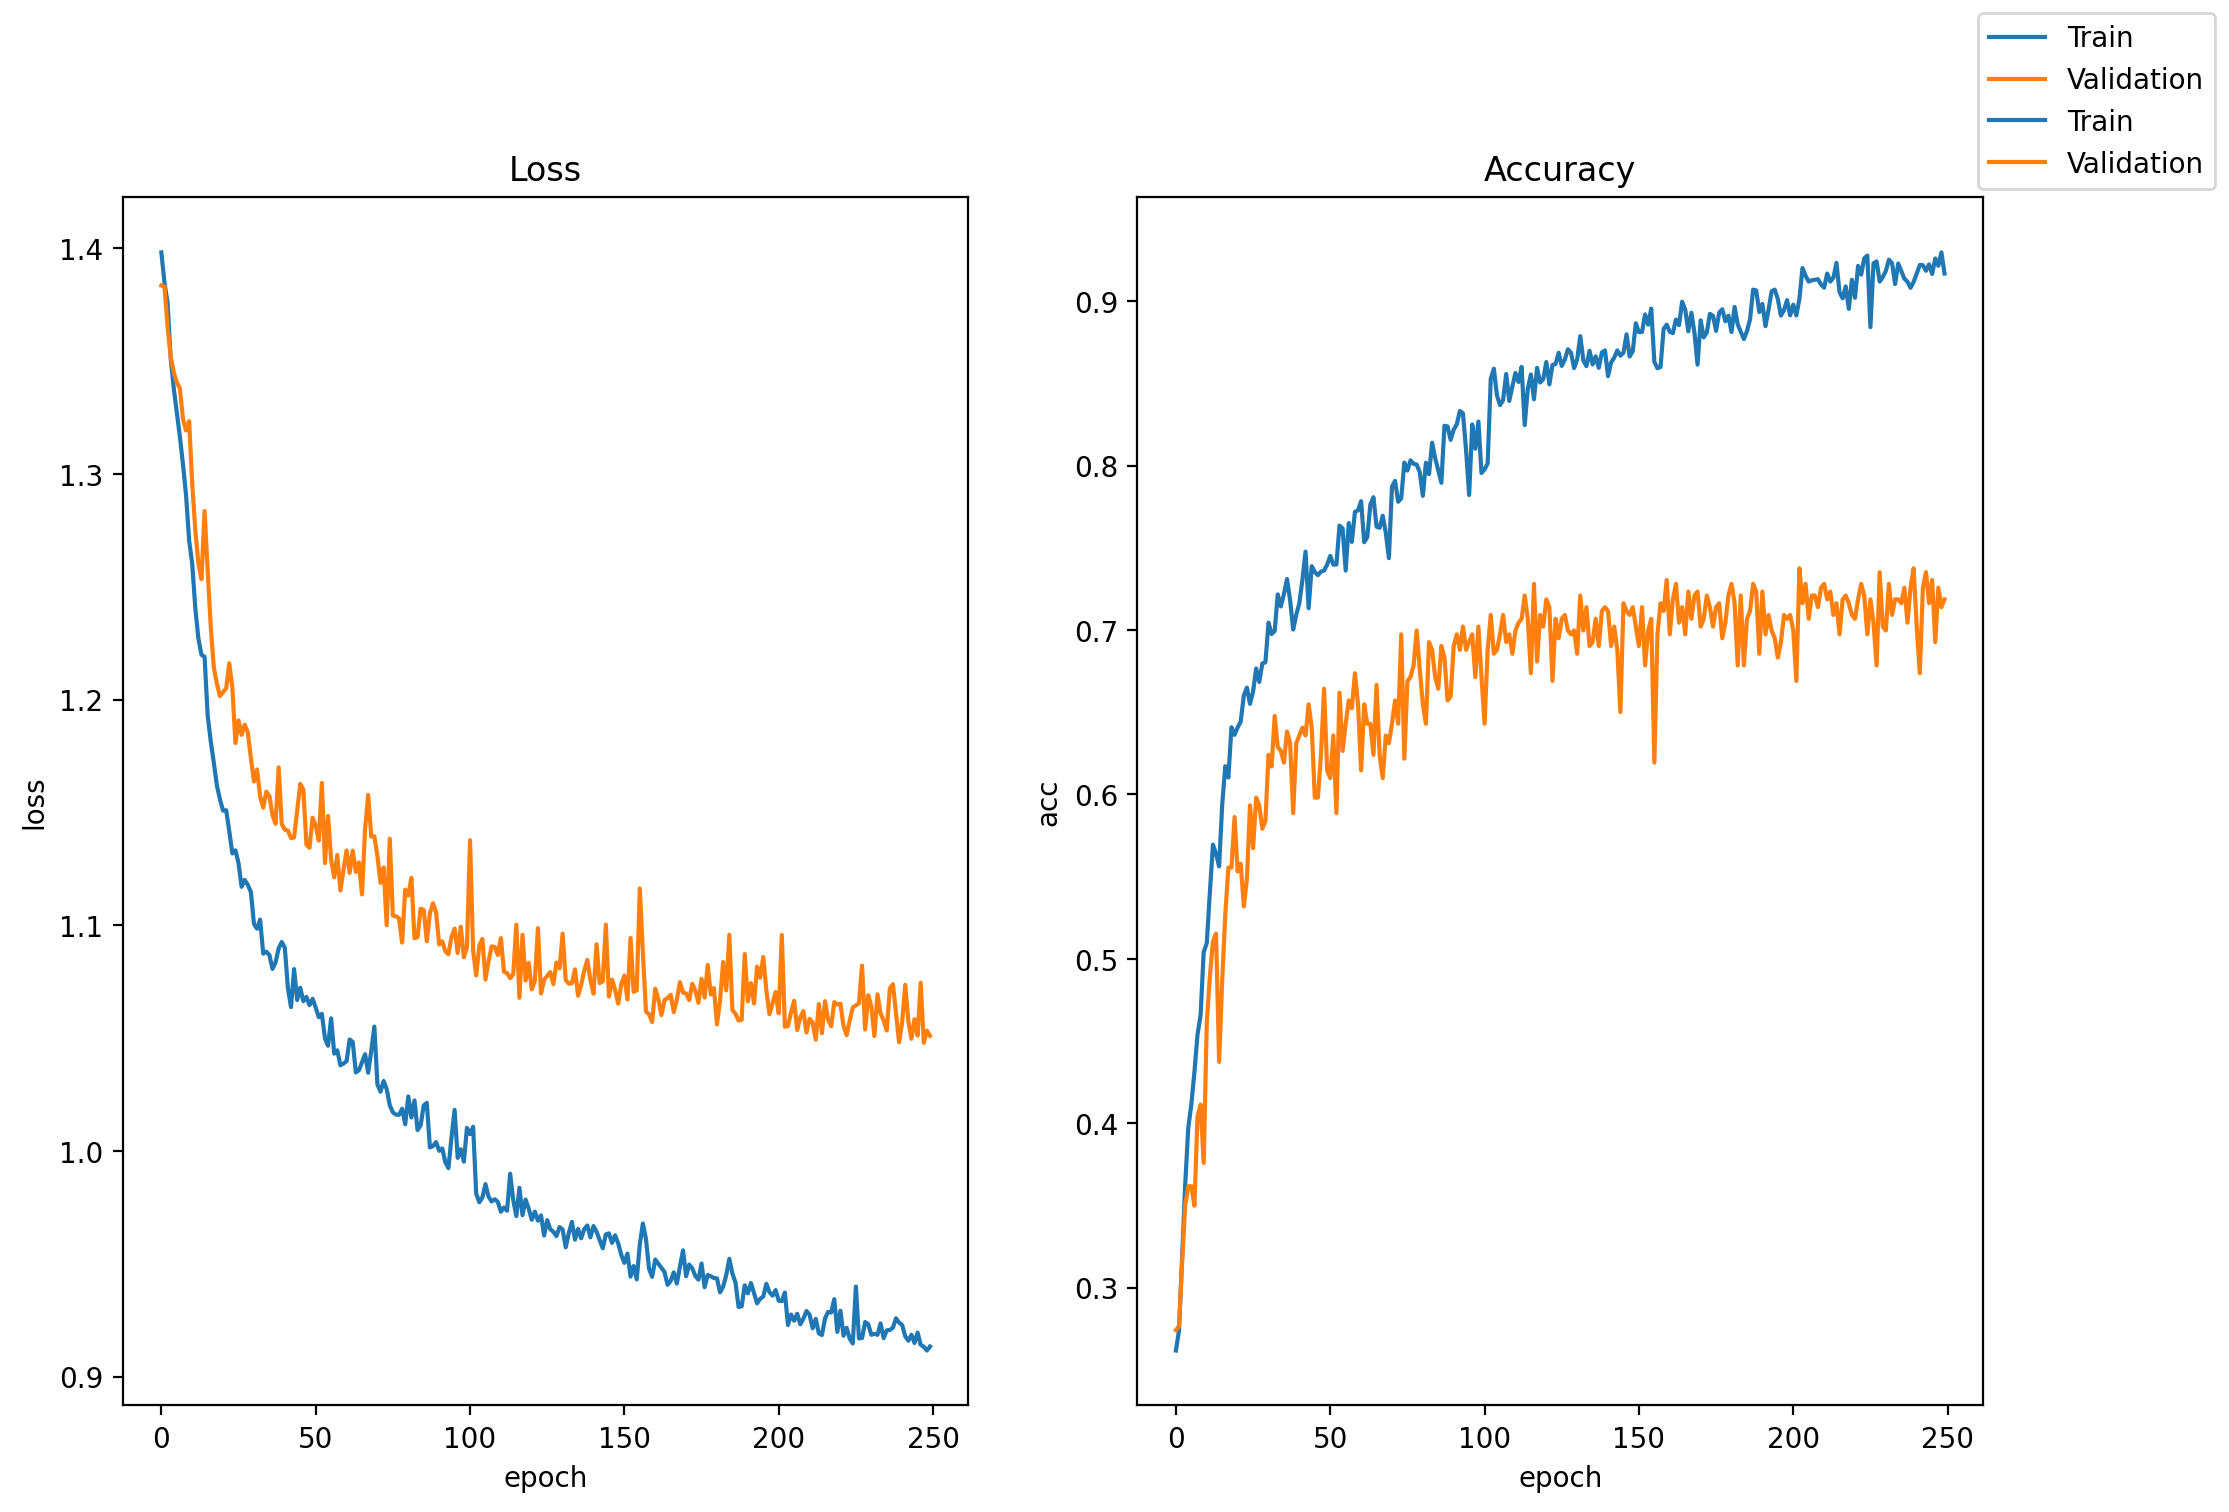

In [27]:
model = ShallowConv(1,4).to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 100,
    'weight_decay': 0.15,
    'val_batch_size': 1 
}
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)


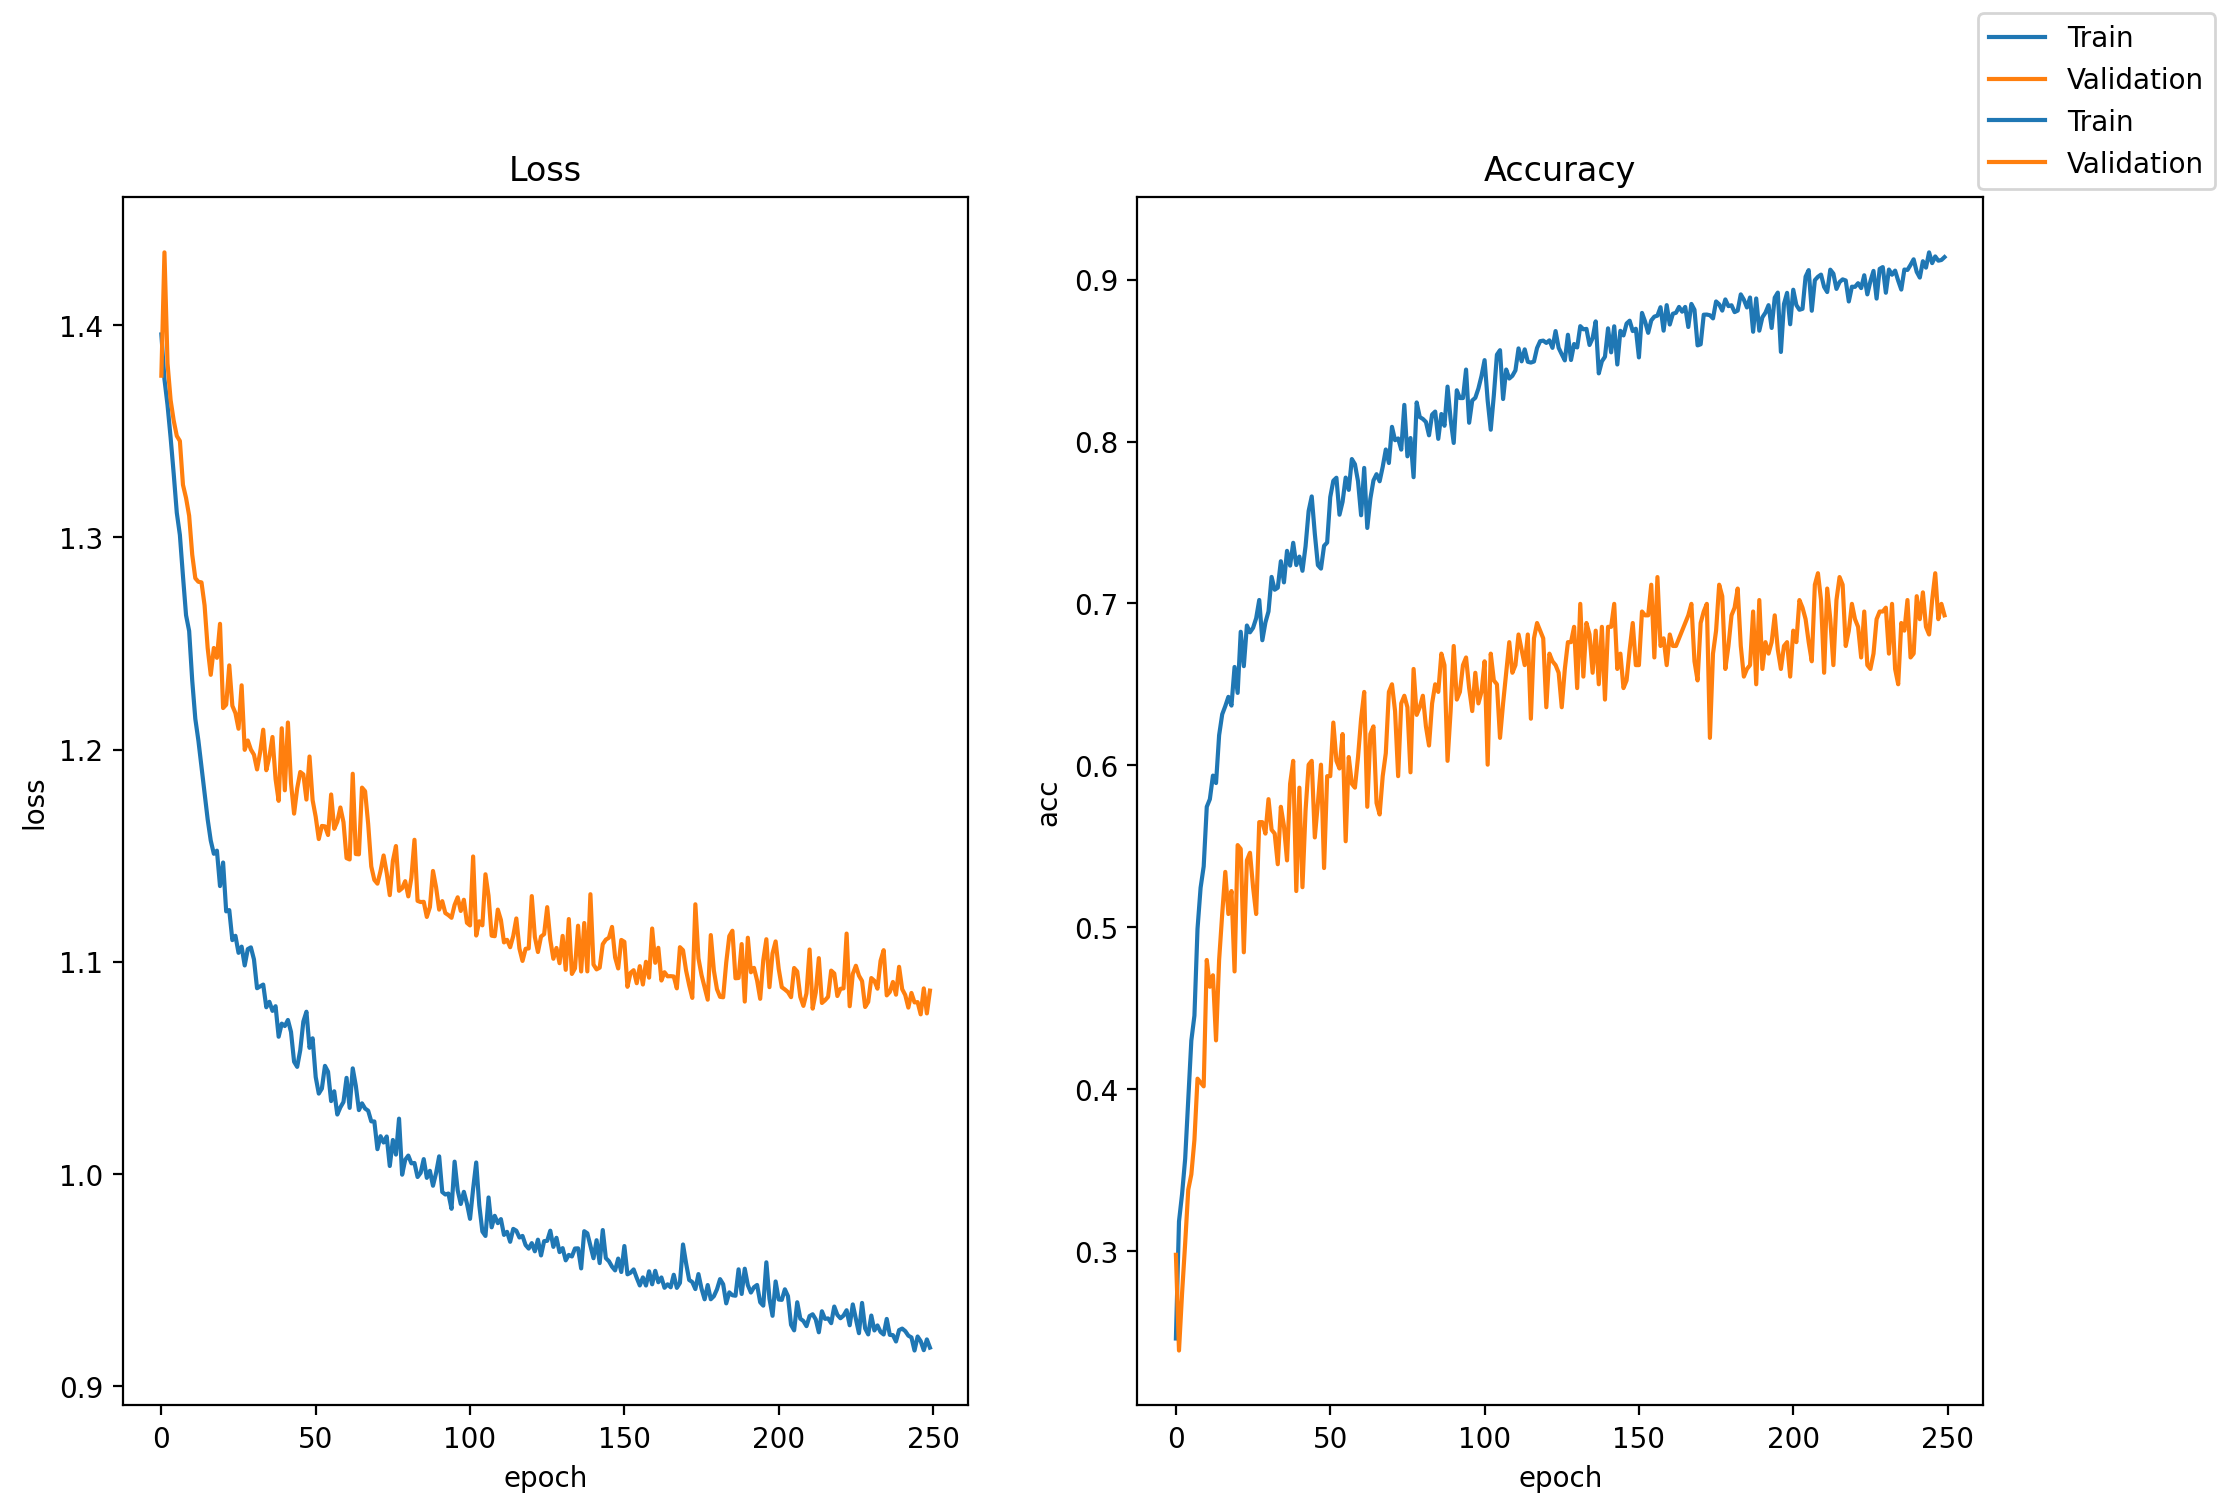

In [26]:
import matplotlib.pyplot as plt 
fig,(ax1,ax2) = plt.subplots(1,2) 
ax1.plot(logs['train_loss'],label='Train')
ax1.plot(logs['val_loss'],label = 'Validation')
ax1.set_title('Loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax2.plot(logs['train_acc'],label = 'Train')
ax2.plot(logs['val_acc'],label = 'Validation')
ax2.set_title('Accuracy')
ax2.set_xlabel('epoch')
ax2.set_ylabel('acc')
fig.legend() 
plt.show() 